<a href="https://colab.research.google.com/github/alu0100880755/Logistica/blob/master/TSP_7%20(Varias%20Pilas).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



RUTA

	Distancia total de la ruta =  387.0 kilómetros

	Costos de distancia mínima en Tenerife:

		De 0 a 4 con distancia = 34 Km
		De 1 a 2 con distancia = 41 Km
		De 2 a 3 con distancia = 9 Km
		De 3 a 0 con distancia = 24 Km
		De 4 a 5 con distancia = 44 Km
		De 5 a 1 con distancia = 11 Km

	Costos de distancia mínima en Gran Canaria:

		De 0 a 3 con distancia = 11 Km
		De 1 a 5 con distancia = 66 Km
		De 2 a 1 con distancia = 41 Km
		De 3 a 2 con distancia = 32 Km
		De 4 a 0 con distancia = 26 Km
		De 5 a 4 con distancia = 48 Km

	Orden de la ruta de distancia mínima:

	 Tenerife:  0--> 4--> 5--> 1--> 2--> 3--> 0
	 Gran Canaria:  0--> 3--> 2--> 1--> 5--> 4--> 0

DATOS DE INTERÉS

	Tiempo Empleado:  67  milisegundos, |  0.07  segundos |  0.0  minutos 
	Iteraciones:  0
	Nodos:  0

DIBUJO DE LA RUTA


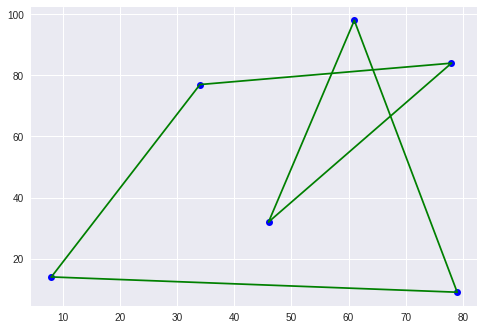

In [2]:
#Instalamos lo necesario
!pip install ortools
from ortools.linear_solver import pywraplp

#Importamos las librerías necesarias
import random
import math
import matplotlib.pyplot as plt
import json

#Declaramos las constantes
nodos = 6
n_pilas = 3
q = 5

#
todos = range(nodos)
otros = range(1,nodos)
pilas = range(n_pilas)


#Precisión
EPS = 0.001

#Semilla para que empiece por un punto similar siempre y poder comparar con varios modelos
random.seed(8888)

#Distancias de Tenerife y Gran Canaria
dist_tf= { (i,j) : random.randint(1,100) for i in todos for j in todos if i!=j}
dist_gc= { (i,j) : random.randint(1,100) for i in todos for j in todos if i!=j}


#Arcos óptimos para el posterior muestreo
dist_final_tf = { }
dist_final_gc = { }

#####################################################################################
#DIBUJAR LOS RESULTADOS

def dibuja(selected):
    points = [(random.randint(0,100),random.randint(0,100)) for i in todos]

    plt.plot([p[0] for p in points], [p[1] for p in points], 'bo')
    for (i,j) in selected:
        plt.plot([points[i][0],points[j][0]], [points[i][1],points[j][1]], 'g-')


#####################################################################################

########

#TSP con varias pilas
def TSP_7():
    solver = pywraplp.Solver('TSP', pywraplp.Solver.CBC_MIXED_INTEGER_PROGRAMMING)

    #VARIABLES
      
    #
    x_tf = {}
    for i in todos:
        for j in todos:
            if i!=j:
                x_tf[i, j] = solver.BoolVar('x_tf[%i, %i]' % (i, j))
    
    #
    x_gc = {}
    for i in todos:
        for j in todos:
            if i!=j:
                x_gc[i, j] = solver.BoolVar('x_gc[%i, %i]' % (i, j))
    
    #
    v_tf = {}
    for i in otros:
        for j in otros:
            if i!=j:
                v_tf[i, j] = solver.BoolVar('v_tf[%i, %i]' % (i, j))  
    #
    v_gc = {}
    for i in otros:
        for j in otros:
            if i!=j:
                v_gc[i, j] = solver.BoolVar('v_gc[%i, %i]' % (i, j))
    #            
    z = {}
    for i in otros:
        for k in pilas:
            z[i, k] = solver.BoolVar('z[%i, %i]' % (i, k))  
    
    
    #Función objetivo
    solver.Minimize(solver.Sum([dist_tf[i,j]*x_tf[i,j] for i in todos for j in todos if i!=j]) + solver.Sum([dist_gc[i,j] * x_gc[i,j] for i in todos for j in todos if i!=j])  )

    
    #Restricciones
    
    #Tenerife
    [ solver.Add(  solver.Sum(x_tf[i,j] for j in todos if i!=j) == 1  )  for i in todos ]
    [ solver.Add(  solver.Sum(x_tf[j,i] for j in todos if i!=j) == 1  )  for i in todos ]
    [ solver.Add(   (v_tf[i,j] + v_tf[j,i]) == 1 ) for i in otros for j in otros if i!=j  ]    
    [ solver.Add(   v_tf[i,j] + v_tf[j,k] <= v_tf[i,k] + 1 ) for i in otros for j in otros if i!=j for k in otros if i!=k and j!=k ]
    [ solver.Add(   x_tf[i,j] <= v_tf[i,j] ) for i in otros for j in otros if i!=j  ]    

    #Gran Canaria
    [ solver.Add(  solver.Sum(x_gc[i,j] for j in todos if i!=j) == 1  )  for i in todos ]
    [ solver.Add(  solver.Sum(x_gc[j,i] for j in todos if i!=j) == 1  )  for i in todos ]
    [ solver.Add(   (v_gc[i,j] + v_gc[j,i]) == 1 ) for i in otros for j in otros if i!=j  ]    
    [ solver.Add(   v_gc[i,j] + v_gc[j,k] <= v_gc[i,k] + 1 ) for i in otros for j in otros if i!=j for k in otros if i!=k and j!=k ]
    [ solver.Add(   x_gc[i,j] <= v_gc[i,j] ) for i in otros for j in otros if i!=j  ]   
    
    #Z
    [ solver.Add(  z[i,k] == 1 ) for i in otros for k in pilas  ]
    [ solver.Add(  z[i,k] == 1 ) for i in otros for k in pilas  ]

    #
    [ solver.Add(  v_tf[i,j] + v_gc[i,j] + z[i,k] + z[j,k] <= 3 ) for i in otros for j in otros if i!=j for k in pilas ]    
    
    
    #Resolvemos
    sol = solver.Solve()

    print("\n\nRUTA")
    
    if sol == solver.OPTIMAL:
            print('\n\tDistancia total de la ruta = ', solver.Objective().Value(),'kilómetros')

            #DISTANCIAS ENTRE NODOS
            print('\n\tCostos de distancia mínima en Tenerife:\n')
            for i in todos:
                for j in todos:
                    if i!=j and x_tf[i,j].solution_value() > EPS :
                        print('\t\tDe %d a %d con distancia = %d Km'  % (i,j,dist_tf[i,j]))
                        dist_final_tf.update({ (i, j): dist_tf[i,j] })   #Actualizamos el diccionario con las soluciones

            
            print('\n\tCostos de distancia mínima en Gran Canaria:\n')
            for i in todos:
                for j in todos:
                    if i!=j and x_gc[i,j].solution_value() > EPS :
                        print('\t\tDe %d a %d con distancia = %d Km'  % (i,j,dist_gc[i,j]))
                        dist_final_gc.update({ (i, j): dist_gc[i,j] })   #Actualizamos el diccionario con las soluciones

            #ORDEN DE LA RUTA
            print('\n\tOrden de la ruta de distancia mínima:\n')
            ruta = '0'; i = 0

            #Solución Tenerife
            while i != -1:
                for j in todos:
                    if i!=j:
                        if x_tf[i, j].solution_value() > 0:
                            ruta += '--> ' + str(j)
                            aux = j
                if aux != 0:
                    i = aux
                else:
                    i = -1
            #Mostramos el orden de la ruta
            print("\t Tenerife: ", ruta)
            
            #Solución Gran Canaria
            ruta2 = '0'; i = 0
            while i != -1:
                for j in todos:
                    if i!=j:
                        if x_gc[i, j].solution_value() > 0:
                            ruta2 += '--> ' + str(j)
                            aux = j
                if aux != 0:
                    i = aux
                else:
                    i = -1
            #Mostramos el orden de la ruta
            print("\t Gran Canaria: ", ruta2)

            #Muestreo del tiempo
            print("\nDATOS DE INTERÉS")

            milisegundos = solver.WallTime()
            segundos = round((milisegundos/1000),2)
            minutos = round((segundos/60),2)
            print("\n\tTiempo Empleado: ", milisegundos, " milisegundos, | ", segundos , " segundos | ", minutos, " minutos ")
            print("\tIteraciones: ", solver.Iterations())
            print("\tNodos: ", solver.nodes())

    else:
            print('\n\tNo existe solución óptima')
            
    #DIBUJO DE LA RUTA
#     print('\nDIBUJO DE LA RUTA')
#     dibuja(dist_final_tf)
    
    print('\nDIBUJO DE LA RUTA')
    dibuja(dist_final_gc)

#Llamamos a la funcion
TSP_7()        